# ** Weather Data Analysis **

## 1. Historische Wetterdaten müssen aus einer CSV-Datei geladen werden

In [3]:
%pip install pandas
%pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np


#data lesen
df = pd.read_parquet("daily_weather.parquet")

# daten anzeigen
print("daten (erste 5 Zeilen):")
print(df.head())

daten (erste 5 Zeilen):
  station_id city_name       date  season  avg_temp_c  min_temp_c  max_temp_c  \
0      41515  Asadabad 1957-07-01  Summer        27.0        21.1        35.6   
1      41515  Asadabad 1957-07-02  Summer        22.8        18.9        32.2   
2      41515  Asadabad 1957-07-03  Summer        24.3        16.7        35.6   
3      41515  Asadabad 1957-07-04  Summer        26.6        16.1        37.8   
4      41515  Asadabad 1957-07-05  Summer        30.8        20.0        41.7   

   precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  \
0               0.0            NaN               NaN                 NaN   
1               0.0            NaN               NaN                 NaN   
2               1.0            NaN               NaN                 NaN   
3               4.1            NaN               NaN                 NaN   
4               0.0            NaN               NaN                 NaN   

   peak_wind_gust_kmh  avg_sea_l

## 2. Alle Datumswerte sind korrekt zu interpretieren und zu standardisieren

In [59]:
#  Datum standardisieren 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print(df["date"].dtype)

datetime64[ns]


In [7]:
print("\nFehlende Werte pro Spalte:")
print(df.isnull().sum())


Fehlende Werte pro Spalte:
station_id                       0
city_name                    13993
date                             0
season                           0
avg_temp_c                 6230907
min_temp_c                 5718229
max_temp_c                 5539346
precipitation_mm           6642500
snow_depth_mm             24208615
avg_wind_dir_deg          24183195
avg_wind_speed_kmh        22350295
peak_wind_gust_kmh        26514277
avg_sea_level_pres_hpa    23618606
sunshine_total_min        26614302
dtype: int64


## 3.Fehlende oder fehlerhafte Wetterdaten sollen erkannt und bereinigt werden. 

In [8]:
# Fehlerhafte Werte erkennen
# Annahmen für Fehler:
# - Temperaturen: min_temp_c < -50 oder max_temp_c > 50 sind unrealistisch
# - avg_temp_c sollte zwischen min_temp_c und max_temp_c liegen
# - Niederschlag: precipitation_mm < 0 ist ungültig
temp_errors = df[(df['min_temp_c'] < -50) | (df['max_temp_c'] > 50) | 
                 (df['avg_temp_c'] < -50) | (df['avg_temp_c'] > 50) |
                 (df['avg_temp_c'] < df['min_temp_c']) | (df['avg_temp_c'] > df['max_temp_c'])]
precip_errors = df[df['precipitation_mm'] < 0]

print("\nFehlerhafte Temperaturwerte:")
print(temp_errors)
print("\nFehlerhafte Niederschlagswerte:")
print(precip_errors)


Fehlerhafte Temperaturwerte:
      station_id city_name        date  season  avg_temp_c  min_temp_c  \
5202       38954  Fayzabad  1914-02-28  Winter        -3.3        -3.2   
6228       38954  Fayzabad  1916-12-20  Winter        -5.6        -4.5   
6229       38954  Fayzabad  1916-12-21  Winter        -6.3        -2.4   
6230       38954  Fayzabad  1916-12-22  Winter        -5.9        -1.9   
6231       38954  Fayzabad  1916-12-23  Winter        -5.8        -2.1   
...          ...       ...         ...     ...         ...         ...   
9693       67975  Masvingo  1979-12-04  Summer        19.5        20.6   
10330      67975  Masvingo  1981-09-01  Spring        13.4        12.8   
10548      67975  Masvingo  1982-04-07  Autumn        29.4        13.4   
11114      67975  Masvingo  1983-10-25  Spring        17.4        18.1   
12709      67975  Masvingo  1988-03-07  Autumn        19.7        19.9   

       max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
5202     

In [ ]:
# Daten bereinigen
# Fehlerhafte Werte zu NaN setzen
df['avg_temp_c'] = np.where((df['avg_temp_c'] < -50) | (df['avg_temp_c'] > 50) | 
                            (df['avg_temp_c'] < df['min_temp_c']) | (df['avg_temp_c'] > df['max_temp_c']), 
                            np.nan, df['avg_temp_c'])
df['min_temp_c'] = np.where(df['min_temp_c'] < -50, np.nan, df['min_temp_c'])
df['max_temp_c'] = np.where(df['max_temp_c'] > 50, np.nan, df['max_temp_c'])
df['precipitation_mm'] = np.where(df['precipitation_mm'] < 0, np.nan, df['precipitation_mm'])

# Fehlende Werte interpolieren
df['avg_temp_c'] = df['avg_temp_c'].interpolate(method='linear')
df['min_temp_c'] = df['min_temp_c'].interpolate(method='linear')
df['max_temp_c'] = df['max_temp_c'].interpolate(method='linear')
df['precipitation_mm'] = df['precipitation_mm'].interpolate(method='linear')

In [10]:
# Bereinigte Daten anzeigen
print("\nBereinigte Daten :")
print(df.head())



Bereinigte Daten :
  station_id city_name        date  season  avg_temp_c  min_temp_c  \
0      41515  Asadabad  1957-07-01  Summer        27.0        21.1   
1      41515  Asadabad  1957-07-02  Summer        22.8        18.9   
2      41515  Asadabad  1957-07-03  Summer        24.3        16.7   
3      41515  Asadabad  1957-07-04  Summer        26.6        16.1   
4      41515  Asadabad  1957-07-05  Summer        30.8        20.0   

   max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
0        35.6               0.0            NaN               NaN   
1        32.2               0.0            NaN               NaN   
2        35.6               1.0            NaN               NaN   
3        37.8               4.1            NaN               NaN   
4        41.7               0.0            NaN               NaN   

   avg_wind_speed_kmh  peak_wind_gust_kmh  avg_sea_level_pres_hpa  \
0                 NaN                 NaN                     NaN   
1           

## 4. Temperaturen ggf. in Celsius (oder andere Einheiten) umrechnen.

In [11]:
# Temperaturen ggf. in eine andere Einheit umrechnen
# Annahme: Daten sind aktuell in Celsius, Ziel ist z. B. Fahrenheit
aktuelle_einheit = "celsius"  
ziel_einheit = "fahrenheit"  

# Umrechnungsfunktionen definieren
def celsius_zu_fahrenheit(c):
    return (c * 9/5) + 32

def fahrenheit_zu_celsius(f):
    return (f - 32) * 5/9

In [12]:
# Umrechnung durchführen
if aktuelle_einheit.lower() != ziel_einheit.lower():
    if ziel_einheit.lower() == "fahrenheit" and aktuelle_einheit.lower() == "celsius":
        df['avg_temp_c'] = df['avg_temp_c'].apply(celsius_zu_fahrenheit)
        df['min_temp_c'] = df['min_temp_c'].apply(celsius_zu_fahrenheit)
        df['max_temp_c'] = df['max_temp_c'].apply(celsius_zu_fahrenheit)
        # Spalten umbenennen
        #df = df.rename(columns={
         #   'avg_temp_c': 'avg_temp_f',
         #   'min_temp_c': 'min_temp_f',
         #   'max_temp_c': 'max_temp_f'
        #})
        print(f"\nTemperaturen von {aktuelle_einheit} nach {ziel_einheit} umgerechnet.")
    elif ziel_einheit.lower() == "celsius" and aktuelle_einheit.lower() == "fahrenheit":
        df['avg_temp_c'] = df['avg_temp_c'].apply(fahrenheit_zu_celsius)
        df['min_temp_c'] = df['min_temp_c'].apply(fahrenheit_zu_celsius)
        df['max_temp_c'] = df['max_temp_c'].apply(fahrenheit_zu_celsius)
        print(f"\nTemperaturen von {aktuelle_einheit} nach {ziel_einheit} umgerechnet.")
    else:
        print("\nFehler: Ungültige Einheitenkombination.")
else:
    print(f"\nKeine Umrechnung nötig, Daten sind bereits in {aktuelle_einheit}.")


Temperaturen von celsius nach fahrenheit umgerechnet.


In [13]:
print("\nBereinigte und umgerechnete Daten :")
print(df.head())


Bereinigte und umgerechnete Daten :
  station_id city_name        date  season  avg_temp_c  min_temp_c  \
0      41515  Asadabad  1957-07-01  Summer       80.60       69.98   
1      41515  Asadabad  1957-07-02  Summer       73.04       66.02   
2      41515  Asadabad  1957-07-03  Summer       75.74       62.06   
3      41515  Asadabad  1957-07-04  Summer       79.88       60.98   
4      41515  Asadabad  1957-07-05  Summer       87.44       68.00   

   max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
0       96.08               0.0            NaN               NaN   
1       89.96               0.0            NaN               NaN   
2       96.08               1.0            NaN               NaN   
3      100.04               4.1            NaN               NaN   
4      107.06               0.0            NaN               NaN   

   avg_wind_speed_kmh  peak_wind_gust_kmh  avg_sea_level_pres_hpa  \
0                 NaN                 NaN                     Na

## 5. Berechnung der täglichen Durchschnittstemperaturen.

In [12]:
#Berechnung der täglichen Durchschnittstemperaturen
# Neue Spalte mit Durchschnitt aus min_temp_f und max_temp_f berechnen
df['tag_avg_temp_c'] = (df['min_temp_c'] + df['max_temp_c']) / 2

print(df.head())

  station_id city_name        date  season  avg_temp_c  min_temp_c  \
0      41515  Asadabad  1957-07-01  Summer       80.60       69.98   
1      41515  Asadabad  1957-07-02  Summer       73.04       66.02   
2      41515  Asadabad  1957-07-03  Summer       75.74       62.06   
3      41515  Asadabad  1957-07-04  Summer       79.88       60.98   
4      41515  Asadabad  1957-07-05  Summer       87.44       68.00   

   max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
0       96.08               0.0            NaN               NaN   
1       89.96               0.0            NaN               NaN   
2       96.08               1.0            NaN               NaN   
3      100.04               4.1            NaN               NaN   
4      107.06               0.0            NaN               NaN   

   avg_wind_speed_kmh  peak_wind_gust_kmh  avg_sea_level_pres_hpa  \
0                 NaN                 NaN                     NaN   
1                 NaN           

## 6. Identikation von Maximal- und Minimaltemperaturen.


In [13]:
# Identifikation von Maximal- und Minimaltemperaturen
global_max_temp = df['max_temp_c'].max()
global_min_temp = df['min_temp_c'].min()

print ("max_temp :", global_max_temp , ziel_einheit )
print ("min_temp : ", global_min_temp ,   ziel_einheit)

max_temp : 122.0 fahrenheit
min_temp :  -58.0 fahrenheit


## 7. Berechnung von Mittelwert, Median und Standardabweichung für verschiedene Parameter.

In [18]:
print(df.columns)

Index(['station_id', 'city_name', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
       'sunshine_total_min'],
      dtype='object')


In [ ]:
print(df["avg_temp_c"])

0        80.60
1        73.04
2        75.74
3        79.88
4        87.44
         ...  
24216    67.10
24217    70.34
24218    71.78
24219    70.70
24220    68.00
Name: avg_temp_c, Length: 27635763, dtype: float64


In [21]:
print(df["min_temp_c"])

0        69.98
1        66.02
2        62.06
3        60.98
4        68.00
         ...  
24216    49.28
24217    50.90
24218    55.40
24219    55.58
24220    57.20
Name: min_temp_c, Length: 27635763, dtype: float64


In [22]:
print(df["max_temp_c"])

0         96.08
1         89.96
2         96.08
3        100.04
4        107.06
          ...  
24216     83.12
24217     88.52
24218     88.70
24219     85.46
24220     81.14
Name: max_temp_c, Length: 27635763, dtype: float64


In [23]:
print(df["precipitation_mm"])

0        0.0
1        0.0
2        1.0
3        4.1
4        0.0
        ... 
24216    0.0
24217    0.0
24218    0.0
24219    0.0
24220    0.0
Name: precipitation_mm, Length: 27635763, dtype: float64


In [47]:
print(df["snow_depth_mm"])
# Die einzigartigen Werte der Spalte anzeigen
numerische_werte = pd.to_numeric(df["snow_depth_mm"], errors='coerce')
# Filtern der numerischen Werte (ohne NaN)
numerische_werte_ohne_nan = numerische_werte.dropna()

# Die bereinigte Liste der numerischen Werte anzeigen
print(numerische_werte_ohne_nan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
24216   NaN
24217   NaN
24218   NaN
24219   NaN
24220   NaN
Name: snow_depth_mm, Length: 27635763, dtype: float64
1438      20.0
1448      71.0
1660     239.0
9360     640.0
22503    201.0
         ...  
5703      71.0
9367      20.0
15405     51.0
15407     79.0
16718     10.0
Name: snow_depth_mm, Length: 3427148, dtype: float64


In [48]:
print(df["avg_wind_dir_deg"])
# Die einzigartigen Werte der Spalte anzeigen
numerische_werte = pd.to_numeric(df["avg_wind_dir_deg"], errors='coerce')
# Filtern der numerischen Werte (ohne NaN)
numerische_werte_ohne_nan = numerische_werte.dropna()

# Die bereinigte Liste der numerischen Werte anzeigen
print(numerische_werte_ohne_nan)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
24216    180.0
24217    146.0
24218    147.0
24219    155.0
24220    141.0
Name: avg_wind_dir_deg, Length: 27635763, dtype: float64
8603      81.0
8604      69.0
8605      60.0
8606      75.0
8607     116.0
         ...  
24216    180.0
24217    146.0
24218    147.0
24219    155.0
24220    141.0
Name: avg_wind_dir_deg, Length: 3452568, dtype: float64


In [49]:
print(df["avg_wind_speed_kmh"])
# Die einzigartigen Werte der Spalte anzeigen
numerische_werte = pd.to_numeric(df["avg_wind_speed_kmh"], errors='coerce')
# Filtern der numerischen Werte (ohne NaN)
numerische_werte_ohne_nan = numerische_werte.dropna()

# Die bereinigte Liste der numerischen Werte anzeigen
print(numerische_werte_ohne_nan)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
24216     4.6
24217     6.3
24218     8.2
24219    10.2
24220    12.9
Name: avg_wind_speed_kmh, Length: 27635763, dtype: float64
8603      5.3
8604      3.8
8605      1.3
8606      2.0
8607      2.4
         ... 
24216     4.6
24217     6.3
24218     8.2
24219    10.2
24220    12.9
Name: avg_wind_speed_kmh, Length: 5285468, dtype: float64


In [50]:
print(df["peak_wind_gust_kmh"])
# Die einzigartigen Werte der Spalte anzeigen
numerische_werte = pd.to_numeric(df["peak_wind_gust_kmh"], errors='coerce')
# Filtern der numerischen Werte (ohne NaN)
numerische_werte_ohne_nan = numerische_werte.dropna()

# Die bereinigte Liste der numerischen Werte anzeigen
print(numerische_werte_ohne_nan)


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
24216   NaN
24217   NaN
24218   NaN
24219   NaN
24220   NaN
Name: peak_wind_gust_kmh, Length: 27635763, dtype: float64
7940     44.5
7941     44.5
7942     20.4
7943     20.4
7944     35.2
         ... 
22428    51.5
22429    61.2
22430    32.0
22431    38.5
22432    35.3
Name: peak_wind_gust_kmh, Length: 1121486, dtype: float64


In [46]:
print(df["avg_sea_level_pres_hpa"])
# Die einzigartigen Werte der Spalte anzeigen
numerische_werte = pd.to_numeric(df["avg_sea_level_pres_hpa"], errors='coerce')
# Filtern der numerischen Werte (ohne NaN)
numerische_werte_ohne_nan = numerische_werte.dropna()

# Die bereinigte Liste der numerischen Werte anzeigen
print(numerische_werte_ohne_nan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
24216   NaN
24217   NaN
24218   NaN
24219   NaN
24220   NaN
Name: avg_sea_level_pres_hpa, Length: 27635763, dtype: float64
8603     1026.4
8604     1023.3
8605     1024.3
8606     1020.1
8607     1018.0
          ...  
24207    1013.9
24208    1016.2
24209    1014.6
24210    1013.2
24211    1026.8
Name: avg_sea_level_pres_hpa, Length: 4017157, dtype: float64


In [51]:
print(df["sunshine_total_min"])
# Die einzigartigen Werte der Spalte anzeigen
numerische_werte = pd.to_numeric(df["sunshine_total_min"], errors='coerce')
# Filtern der numerischen Werte (ohne NaN)
numerische_werte_ohne_nan = numerische_werte.dropna()

# Die bereinigte Liste der numerischen Werte anzeigen
print(numerische_werte_ohne_nan)


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
24216   NaN
24217   NaN
24218   NaN
24219   NaN
24220   NaN
Name: sunshine_total_min, Length: 27635763, dtype: float64
512      342.0
513      402.0
514      462.0
515      456.0
516      378.0
         ...  
25063      0.0
25064      0.0
25081      0.0
25083      0.0
25113      0.0
Name: sunshine_total_min, Length: 1021461, dtype: float64


In [ ]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "avg_temp_c" (Durchschnittstemperatur in Celsius)

# Mittelwert der avg Temperatur berechnen
print("avg_temp_c - Mittelwert:", df["avg_temp_c"].mean())

# Median der avg Temperatur berechnen
print("avg_temp_c - Median:", df["avg_temp_c"].median())

# Standardabweichung der avg Temperatur berechnen
print("avg_temp_c - Standardabweichung:", df["avg_temp_c"].std())

avg_temp_c - Mittelwert: 60.05092543563913
avg_temp_c - Median: 63.14
avg_temp_c - Standardabweichung: 20.86825847330654


In [ ]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "min_temp_c" 

# Mittelwert der min Temperatur berechnen
print("min_temp_c - Mittelwert:", df["min_temp_c"].mean())

# Median der min Temperatur berechnen
print("min_temp_c - Median:", df["min_temp_c"].median())

# Standardabweichung der min Temperatur berechnen
print("min_temp_c - Standardabweichung:", df["min_temp_c"].std())

min_temp_c - Mittelwert: 50.76290060238248
min_temp_c - Median: 53.06
min_temp_c - Standardabweichung: 20.63645660618562


In [33]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "max_temp_c" 

# Mittelwert der max Temperatur berechnen
print("max_temp_c - Mittelwert:", df["min_temp_c"].mean())

# Median der max Temperatur berechnen
print("max_temp_c - Median:", df["max_temp_c"].median())

# Standardabweichung der max Temperatur berechnen
print("max_temp_c - Standardabweichung:", df["max_temp_c"].std())

max_temp_c - Mittelwert: 50.76290060238248
max_temp_c - Median: 73.58
max_temp_c - Standardabweichung: 22.27724644738596


In [ ]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "precipitation_mm" 

# Mittelwert der precipitation_mm  berechnen
print("precipitation_mm - Mittelwert:", df["precipitation_mm"].mean())

# Median der precipitation_mm berechnen
print("precipitation_mm - Median:", df["precipitation_mm"].median())

# Standardabweichung der precipitation_mm berechnen
print("precipitation_mm - Standardabweichung:", df["precipitation_mm"].std())

precipitation_mm - Mittelwert: 3.4651448360589763
precipitation_mm - Median: 0.0
precipitation_mm - Standardabweichung: 12.072316720929368


In [ ]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "snow_depth_mm" 

# Mittelwert der snow_depth_mm  berechnen
print("snow_depth_mm - Mittelwert:", df["snow_depth_mm"].mean())

# Median der snow_depth_mm berechnen
print("snow_depth_mm - Median:", df["snow_depth_mm"].median())

# Standardabweichung der snow_depth_mm berechnen
print("snow_depth_mm - Standardabweichung:", df["snow_depth_mm"].std())

snow_depth_mm - Mittelwert: 79.96230889357565
snow_depth_mm - Median: 0.0
snow_depth_mm - Standardabweichung: 350.07564558397144


In [36]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "avg_wind_dir_deg" 

# Mittelwert der avg_wind_dir_deg  berechnen
print("avg_wind_dir_deg - Mittelwert:", df["avg_wind_dir_deg"].mean())

# Median der avg_wind_dir_deg berechnen
print("avg_wind_dir_deg - Median:", df["avg_wind_dir_deg"].median())

# Standardabweichung der avg_wind_dir_deg berechnen
print("avg_wind_dir_deg - Standardabweichung:", df["avg_wind_dir_deg"].std())

avg_wind_dir_deg - Mittelwert: 182.09786773207654
avg_wind_dir_deg - Median: 191.0
avg_wind_dir_deg - Standardabweichung: 105.19963629013685


In [37]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "avg_wind_speed_kmh" 

# Mittelwert der avg_wind_speed_kmh  berechnen
print("avg_wind_speed_kmh - Mittelwert:", df["avg_wind_speed_kmh"].mean())

# Median deravg_wind_speed_kmh berechnen
print(" avg_wind_speed_kmh- Median:", df["avg_wind_speed_kmh"].median())

# Standardabweichung der avg_wind_speed_kmh berechnen
print("avg_wind_speed_kmh - Standardabweichung:", df["avg_wind_speed_kmh"].std())

avg_wind_speed_kmh - Mittelwert: 12.408272947636823
 avg_wind_speed_kmh- Median: 10.9
avg_wind_speed_kmh - Standardabweichung: 7.054249020350885


In [38]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "peak_wind_gust_kmh" 

# Mittelwert der  peak_wind_gust_kmh berechnen
print("peak_wind_gust_kmh - Mittelwert:", df["peak_wind_gust_kmh"].mean())

# Median der peak_wind_gust_kmh berechnen
print("peak_wind_gust_kmh - Median:", df["peak_wind_gust_kmh"].median())

# Standardabweichung der peak_wind_gust_kmh berechnen
print("peak_wind_gust_kmh - Standardabweichung:", df["peak_wind_gust_kmh"].std())

peak_wind_gust_kmh - Mittelwert: 38.57887089094291
peak_wind_gust_kmh - Median: 35.3
peak_wind_gust_kmh - Standardabweichung: 20.109514709207208


In [39]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "avg_sea_level_pres_hpa" 

# Mittelwert der avg_sea_level_pres_hpa berechnen
print("avg_sea_level_pres_hpa - Mittelwert:", df["avg_sea_level_pres_hpa"].mean())

# Median der avg_sea_level_pres_hpa berechnen
print("avg_sea_level_pres_hpa - Median:", df["avg_sea_level_pres_hpa"].median())

# Standardabweichung der avg_sea_level_pres_hpa berechnen
print("avg_sea_level_pres_hpa - Standardabweichung:", df["avg_sea_level_pres_hpa"].std())

avg_sea_level_pres_hpa - Mittelwert: 1015.0321404665048
avg_sea_level_pres_hpa - Median: 1014.7
avg_sea_level_pres_hpa - Standardabweichung: 8.520449951797099


In [40]:
# Berechnung und Ausgabe der statistischen Kennzahlen für die Spalte "sunshine_total_min" 

# Mittelwert der  sunshine_total_min berechnen
print("sunshine_total_min - Mittelwert:", df["sunshine_total_min"].mean())

# Median der sunshine_total_min berechnen
print("sunshine_total_min - Median:", df["sunshine_total_min"].median())

# Standardabweichung der sunshine_total_min berechnen
print("sunshine_total_min - Standardabweichung:", df["sunshine_total_min"].std())

sunshine_total_min - Mittelwert: 350.43987092997185
sunshine_total_min - Median: 346.0
sunshine_total_min - Standardabweichung: 281.51420407411683


## 8.Analyse und Visualisierung saisonaler Muster (z. B. Sommer vs. Winter).

In [ ]:
# Funktion zur Bestimmung der Jahreszeit anhand des Monats
def saison_bestimmen(monat):
    if monat in [12, 1, 2]:
        return "Winter"
    elif monat in [6, 7, 8]:
        return "Sommer"
    elif monat in [3, 4, 5]:
        return "Frühling"
    else:
        return "Herbst"

df["month"] = df["date"].dt.month
# Jahreszeit zuweisen
df["season"] = df["month"].apply(saison_bestimmen)

# Überprüfen der ersten Zeilen, um sicherzustellen, dass die Jahreszeit korrekt zugewiesen wird
print(df[["date", "month", "season"]].head())


            date  month  season
0     1957-07-01      7  Sommer
1     1957-07-02      7  Sommer
2     1957-07-03      7  Sommer
3     1957-07-04      7  Sommer
4     1957-07-05      7  Sommer
...          ...    ...     ...
24216 2023-09-01      9  Herbst
24217 2023-09-02      9  Herbst
24218 2023-09-03      9  Herbst
24219 2023-09-04      9  Herbst
24220 2023-09-05      9  Herbst

[27635763 rows x 3 columns]


In [64]:
# Sommer- und Winterdaten filtern
summer_data = df[df['season'] == 'Sommer']
winter_data = df[df['season'] == 'Winter']

# Mittelwerte für Sommer und Winter berechnen
summer_mean = summer_data['avg_temp_c'].mean()
winter_mean = winter_data['avg_temp_c'].mean()

# Median und Standardabweichung für Sommer und Winter
summer_median = summer_data['avg_temp_c'].median()
winter_median = winter_data['avg_temp_c'].median()

summer_std = summer_data['avg_temp_c'].std()
winter_std = winter_data['avg_temp_c'].std()

# Ausgabe der Ergebnisse
print(f"Sommer - Mittelwert: {summer_mean}, Median: {summer_median}, Std: {summer_std}")
print(f"Winter - Mittelwert: {winter_mean}, Median: {winter_median}, Std: {winter_std}")


Sommer - Mittelwert: 69.3080161592073, Median: 71.6, Std: 14.417791343490325
Winter - Mittelwert: 49.950662050103375, Median: 50.90878009978722, Std: 25.400684321373124


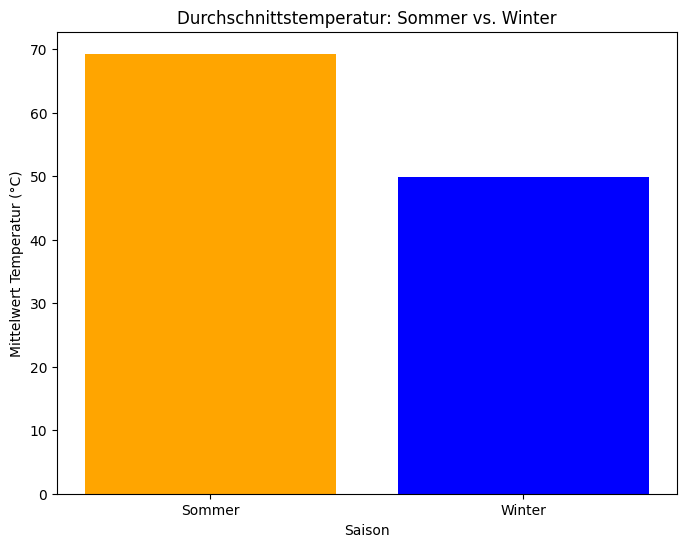

In [69]:
import matplotlib.pyplot as plt

# Mittelwerte für Sommer und Winter
seasons = ['Sommer', 'Winter']
means = [summer_mean, winter_mean]

# Balkendiagramm plotten
plt.figure(figsize=(8, 6))
plt.bar(seasons, means, color=['orange', 'blue'])
plt.title('Durchschnittstemperatur: Sommer vs. Winter')
plt.ylabel('Mittelwert Temperatur (°C)')
plt.xlabel('Saison')
plt.show()


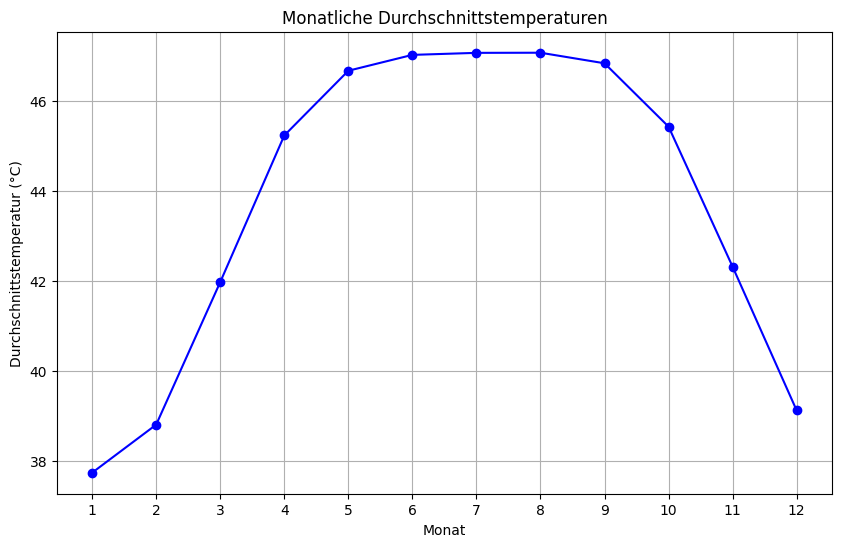

In [70]:
# Mittelwert der Temperatur für jeden Monat berechnen
monthly_avg = df.groupby('month')['avg_temp_c'].mean()

# Liniendiagramm plotten
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='b')
plt.title('Monatliche Durchschnittstemperaturen')
plt.ylabel('Durchschnittstemperatur (°C)')
plt.xlabel('Monat')
plt.xticks(range(1, 13))  # Monate von 1 bis 12
plt.grid(True)
plt.show()
